In [1]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Set style for publication-quality figures
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.dpi'] = 150
plt.rcParams['font.size'] = 11
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'

print("✅ Libraries imported")

✅ Libraries imported


In [2]:
# Define output path
OUTPUT_PATH = 'results/figures/'

import os
os.makedirs(OUTPUT_PATH, exist_ok=True)
print(f"✅ Output path: {OUTPUT_PATH}")

✅ Output path: /content/drive/MyDrive/Fall 2025/Foundations of Artificial Intelligence/Final Project/figures/


In [3]:
# =============================================================================
# RESULTS DATA FROM YOUR EXPERIMENTS
# =============================================================================

# Model results
models_data = {
    'Model': ['Naive Bayes', 'Logistic Regression', 'Ridge Regression', 'Ordinal Logistic Regression'],
    'Model_Short': ['NB', 'LR', 'Ridge', 'OLR'],
    'Encoding': ['Nominal', 'Nominal', 'Ordinal', 'Ordinal'],
    'Accuracy': [0.6312, 0.6595, 0.5029, 0.6586],
    'MAE': [0.6651, 0.5337, 0.6055, 0.5360],
    'F1_Macro': [0.2321, 0.3793, 0.3063, 0.3702],
    'F1_Weighted': [0.5129, 0.6064, 0.5244, 0.6049],
    'Adjacent_Error': [0.5563, 0.6517, 0.8192, 0.6526],
    'Severe_Error': [0.4437, 0.3483, 0.1808, 0.3474]
}

df_results = pd.DataFrame(models_data)

print("📊 Model Results:")
print("="*80)
display(df_results[['Model', 'Encoding', 'Accuracy', 'MAE', 'F1_Macro', 'Severe_Error']])

📊 Model Results:


,Model,Encoding,Accuracy,MAE,F1_Macro,Severe_Error
0,Naive Bayes,Nominal,0.6312,0.6651,0.2321,0.4437
1,Logistic Regression,Nominal,0.6595,0.5337,0.3793,0.3483
2,Ridge Regression,Ordinal,0.5029,0.6055,0.3063,0.1808
3,Ordinal Logistic Regression,Ordinal,0.6586,0.5360,0.3702,0.3474


In [4]:
# Per-class F1 scores from classification reports
per_class_f1 = {
    'Rating': [1, 2, 3, 4, 5],
    'Naive Bayes': [0.2980, 0.0000, 0.0075, 0.0797, 0.7751],
    'Logistic Regression': [0.5098, 0.1006, 0.1800, 0.3005, 0.8054],
    'Ridge Regression': [0.1256, 0.1326, 0.2408, 0.3507, 0.6817],
    'Ordinal LR': [0.4332, 0.1141, 0.1993, 0.2964, 0.8080]
}

df_f1 = pd.DataFrame(per_class_f1)

print("\n📊 Per-Class F1 Scores:")
print("="*80)
display(df_f1)


📊 Per-Class F1 Scores:


,Rating,Naive Bayes,Logistic Regression,Ridge Regression,Ordinal LR
0,1,0.2980,0.5098,0.1256,0.4332
1,2,0.0000,0.1006,0.1326,0.1141
2,3,0.0075,0.1800,0.2408,0.1993
3,4,0.0797,0.3005,0.3507,0.2964
4,5,0.7751,0.8054,0.6817,0.8080


In [5]:
# Class distribution
class_dist = {
    'Rating': [1, 2, 3, 4, 5],
    'Count': [2835, 2161, 3964, 10103, 30897],
    'Percentage': [5.7, 4.3, 7.9, 20.2, 61.8]
}

df_class = pd.DataFrame(class_dist)

print("\n📊 Class Distribution:")
print("="*80)
display(df_class)


📊 Class Distribution:


,Rating,Count,Percentage
0,1,2835,5.7
1,2,2161,4.3
2,3,3964,7.9
3,4,10103,20.2
4,5,30897,61.8


In [6]:
# Confusion matrices from your results
# Logistic Regression (Nominal) - Best accuracy
cm_lr = np.array([
    [248, 28, 46, 40, 205],
    [63, 26, 57, 79, 207],
    [45, 14, 97, 176, 461],
    [22, 6, 50, 473, 1470],
    [28, 11, 35, 359, 5746]
])

# Ridge Regression (Ordinal) - Best severe error
cm_ridge = np.array([
    [39, 140, 241, 135, 12],
    [10, 46, 187, 177, 12],
    [5, 48, 219, 430, 91],
    [0, 14, 182, 1083, 742],
    [0, 14, 197, 2330, 3638]
])

# Naive Bayes (Nominal)
cm_nb = np.array([
    [111, 0, 1, 14, 441],
    [22, 0, 0, 22, 388],
    [17, 0, 3, 51, 722],
    [14, 0, 2, 90, 1915],
    [14, 0, 2, 60, 6103]
])

# Ordinal Logistic Regression
cm_olr = np.array([
    [188, 50, 61, 36, 232],
    [51, 32, 71, 78, 200],
    [30, 27, 114, 167, 455],
    [14, 10, 64, 456, 1477],
    [18, 10, 41, 319, 5791]
])

print("✅ Confusion matrices loaded")

✅ Confusion matrices loaded


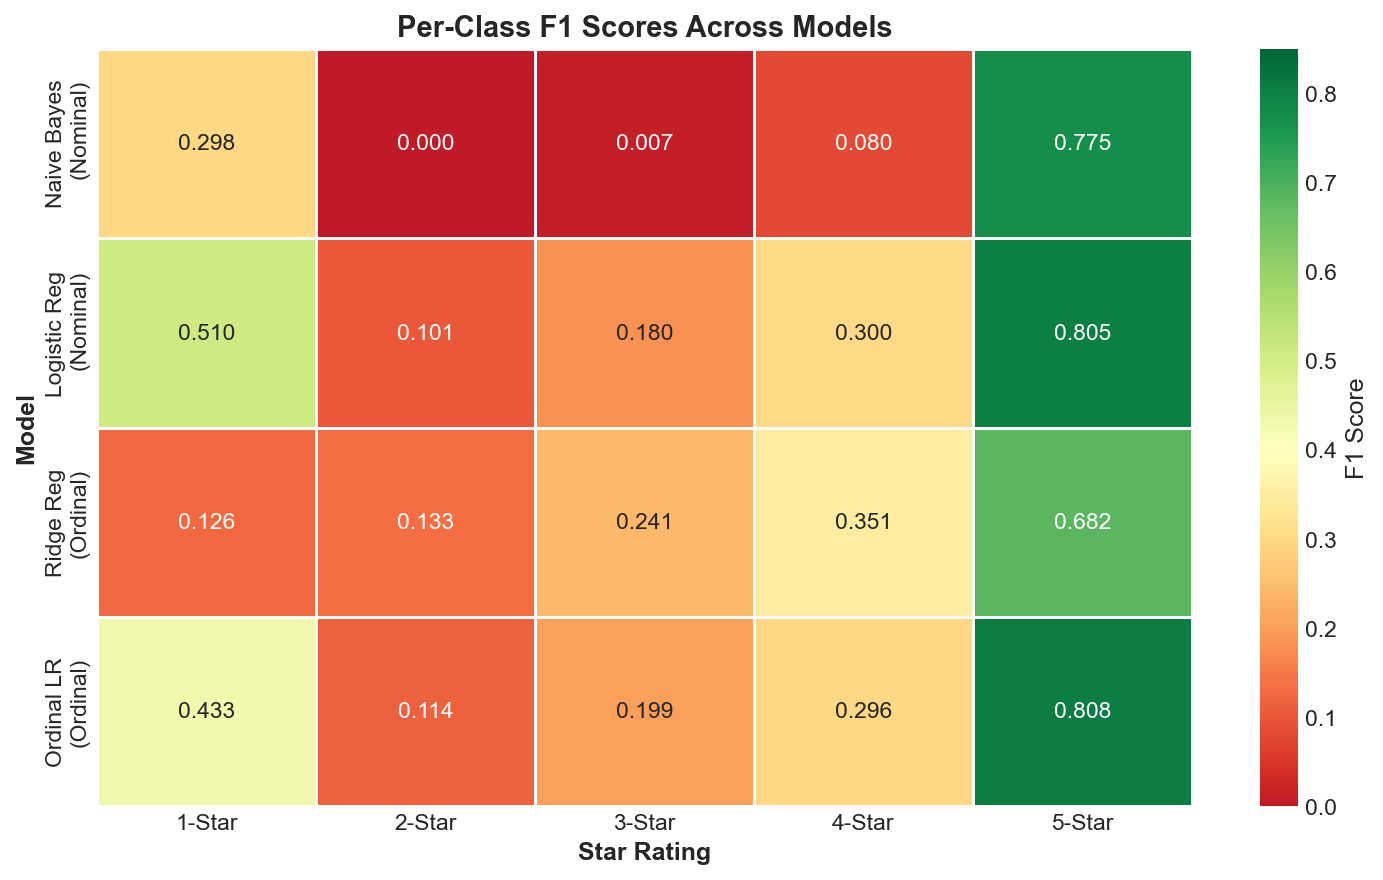


✅ Saved: fig_1_f1_heatmap.png


In [7]:
fig, ax = plt.subplots(figsize=(10, 6))

# Prepare data for heatmap
heatmap_data = df_f1.set_index('Rating').T
heatmap_data.index = ['Naive Bayes\n(Nominal)', 'Logistic Reg\n(Nominal)', 
                       'Ridge Reg\n(Ordinal)', 'Ordinal LR\n(Ordinal)']

sns.heatmap(heatmap_data, annot=True, fmt='.3f', cmap='RdYlGn', 
            center=0.4, vmin=0, vmax=0.85,
            cbar_kws={'label': 'F1 Score'},
            linewidths=0.5, ax=ax)

ax.set_xlabel('Star Rating', fontsize=12, fontweight='bold')
ax.set_ylabel('Model', fontsize=12, fontweight='bold')
ax.set_title('Per-Class F1 Scores Across Models', fontsize=14, fontweight='bold')
ax.set_xticklabels(['1-Star', '2-Star', '3-Star', '4-Star', '5-Star'], fontsize=11)

plt.tight_layout()
plt.savefig(f'{OUTPUT_PATH}fig_1_f1_heatmap.png', facecolor='white')
plt.show()
print("\n✅ Saved: fig_1_f1_heatmap.png")

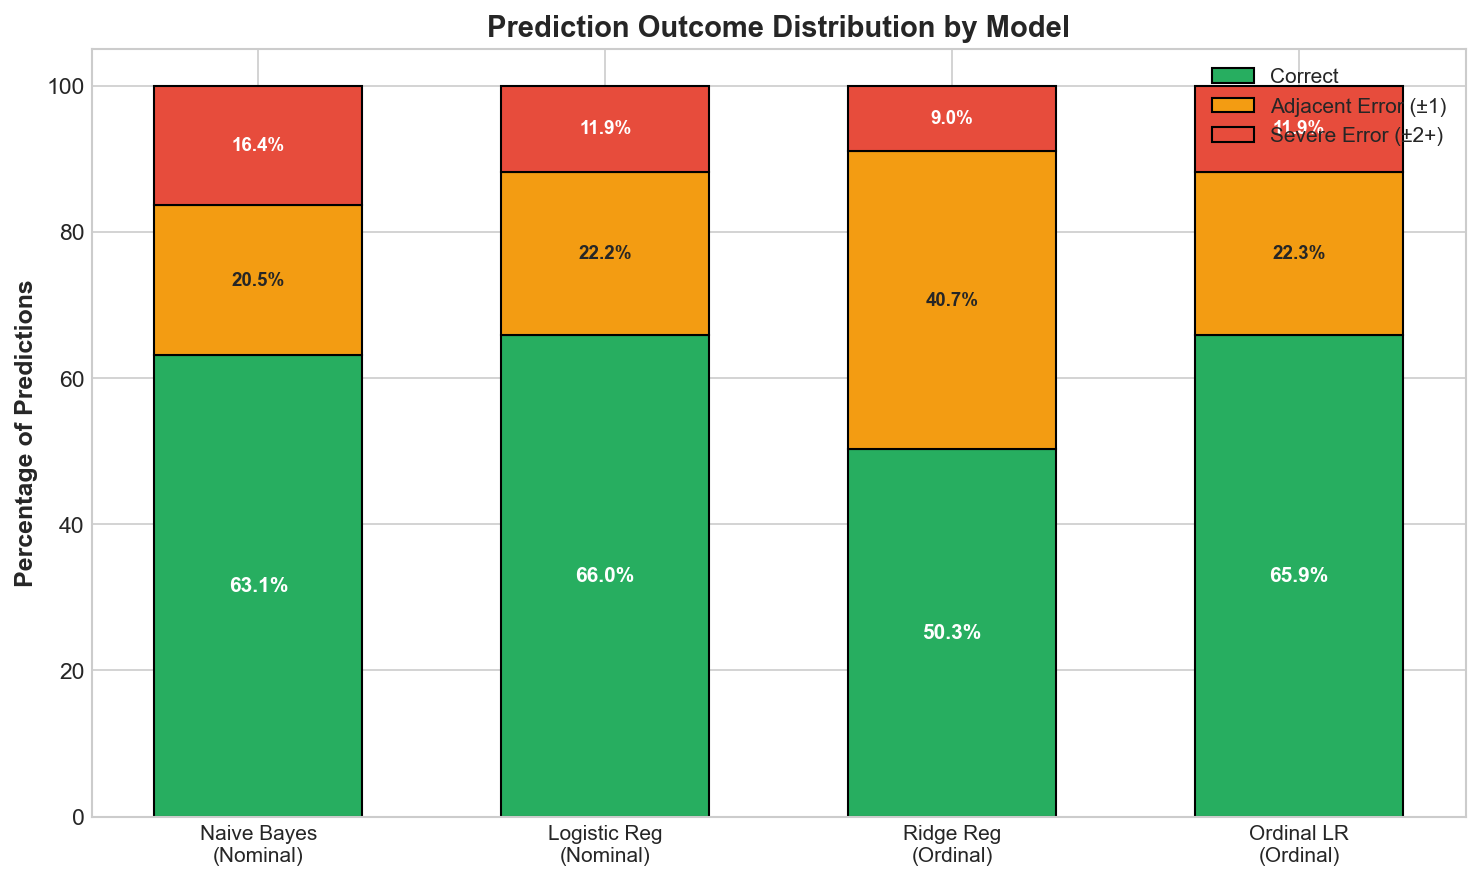


✅ Saved: fig_2_error_distribution.png


In [8]:
fig, ax = plt.subplots(figsize=(10, 6))

models = ['Naive Bayes\n(Nominal)', 'Logistic Reg\n(Nominal)', 
          'Ridge Reg\n(Ordinal)', 'Ordinal LR\n(Ordinal)']

# Calculate correct, adjacent error, and severe error percentages
correct = [63.12, 65.95, 50.29, 65.86]
# Adjacent errors (of the incorrect predictions)
adjacent_pct = [55.63, 65.17, 81.92, 65.26]
severe_pct = [44.37, 34.83, 18.08, 34.74]

# Convert to absolute percentages
incorrect = [100 - c for c in correct]
adjacent = [inc * adj / 100 for inc, adj in zip(incorrect, adjacent_pct)]
severe = [inc * sev / 100 for inc, sev in zip(incorrect, severe_pct)]

x = np.arange(len(models))
width = 0.6

# Stacked bar
bars1 = ax.bar(x, correct, width, label='Correct', color='#27ae60', edgecolor='black')
bars2 = ax.bar(x, adjacent, width, bottom=correct, label='Adjacent Error (±1)', 
               color='#f39c12', edgecolor='black')
bars3 = ax.bar(x, severe, width, bottom=[c+a for c,a in zip(correct, adjacent)], 
               label='Severe Error (±2+)', color='#e74c3c', edgecolor='black')

ax.set_ylabel('Percentage of Predictions', fontsize=12, fontweight='bold')
ax.set_title('Prediction Outcome Distribution by Model', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=10)
ax.legend(loc='upper right', fontsize=10)
ax.set_ylim(0, 105)

# Add percentage labels
for i, (c, a, s) in enumerate(zip(correct, adjacent, severe)):
    ax.text(i, c/2, f'{c:.1f}%', ha='center', va='center', fontsize=10, fontweight='bold', color='white')
    ax.text(i, c + a/2, f'{a:.1f}%', ha='center', va='center', fontsize=9, fontweight='bold')
    ax.text(i, c + a + s/2, f'{s:.1f}%', ha='center', va='center', fontsize=9, fontweight='bold', color='white')

plt.tight_layout()
plt.savefig(f'{OUTPUT_PATH}fig_2_error_distribution.png', facecolor='white')
plt.show()
print("\n✅ Saved: fig_2_error_distribution.png")

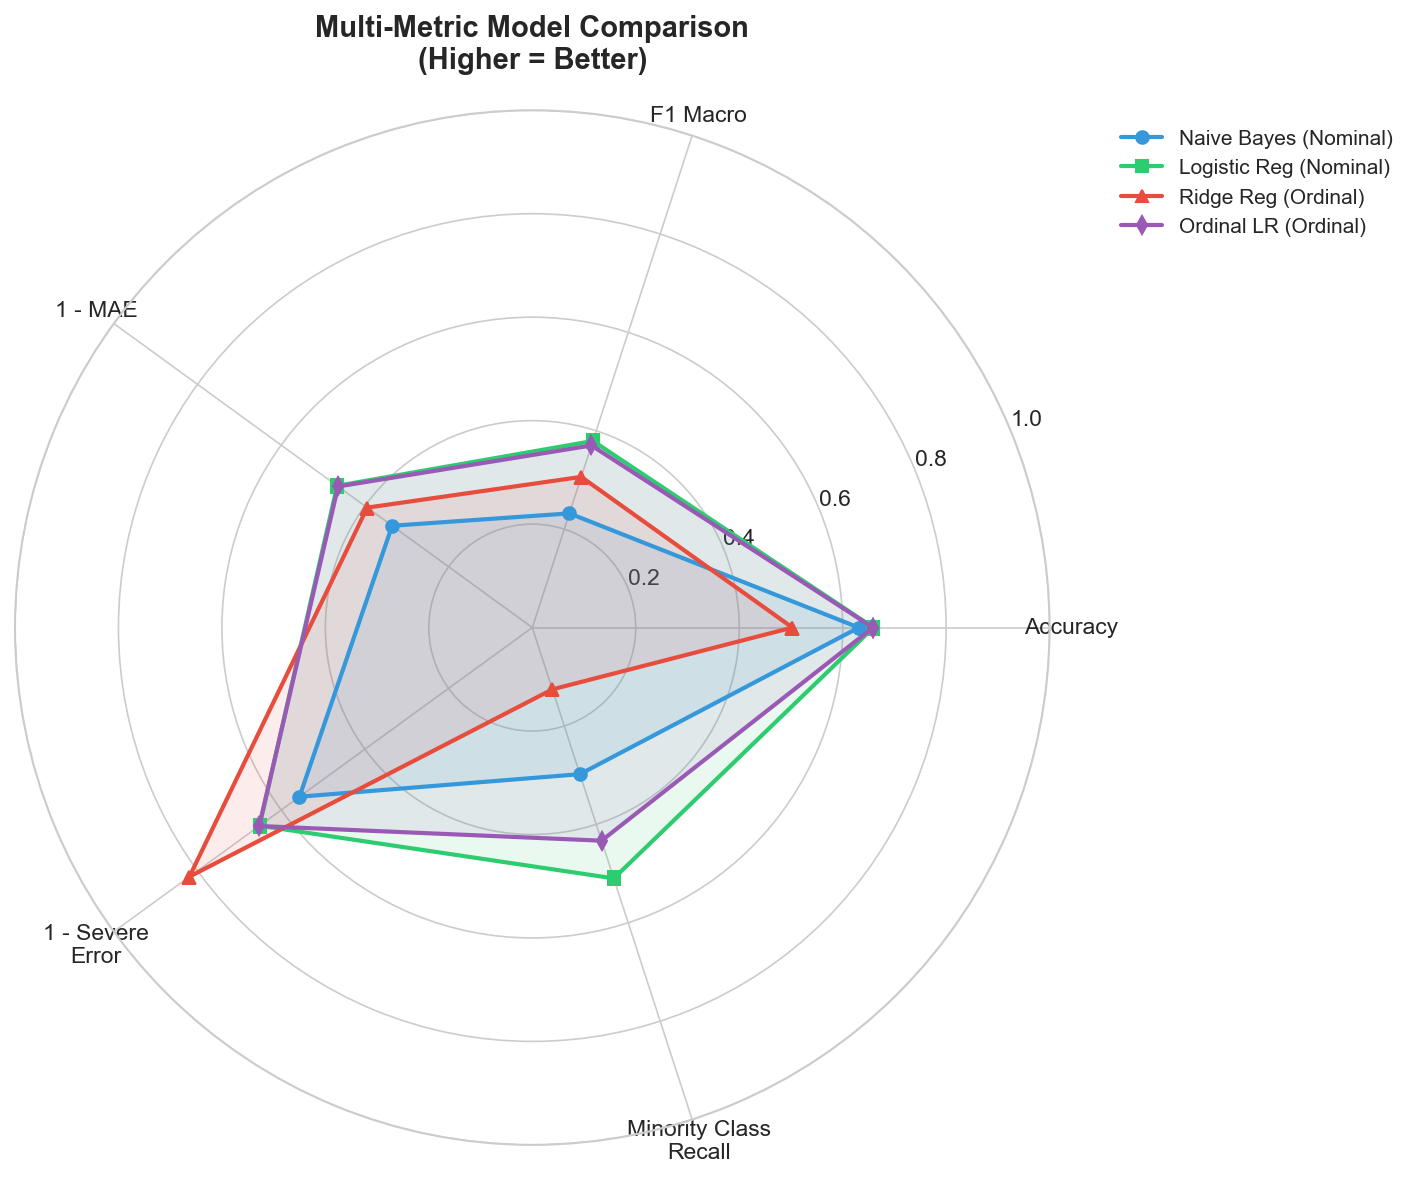


✅ Saved: fig_3_radar_comparison.png


In [9]:
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(polar=True))

# Metrics (normalized to 0-1 scale where higher is better)
categories = ['Accuracy', 'F1 Macro', '1 - MAE', '1 - Severe\nError', 'Minority Class\nRecall']

# Data for each model (normalized so higher = better)
nb_vals = [0.6312, 0.2321, 1-0.6651, 1-0.4437, 0.2980]
lr_vals = [0.6595, 0.3793, 1-0.5337, 1-0.3483, 0.5098]
ridge_vals = [0.5029, 0.3063, 1-0.6055, 1-0.1808, 0.1256]
olr_vals = [0.6586, 0.3702, 1-0.5360, 1-0.3474, 0.4332]

# Number of variables
N = len(categories)

# Compute angle for each category
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]  # Complete the loop

# Add values (close the loop)
nb_vals += nb_vals[:1]
lr_vals += lr_vals[:1]
ridge_vals += ridge_vals[:1]
olr_vals += olr_vals[:1]

# Plot
ax.plot(angles, nb_vals, 'o-', linewidth=2, label='Naive Bayes (Nominal)', color='#3498db')
ax.fill(angles, nb_vals, alpha=0.1, color='#3498db')

ax.plot(angles, lr_vals, 's-', linewidth=2, label='Logistic Reg (Nominal)', color='#2ecc71')
ax.fill(angles, lr_vals, alpha=0.1, color='#2ecc71')

ax.plot(angles, ridge_vals, '^-', linewidth=2, label='Ridge Reg (Ordinal)', color='#e74c3c')
ax.fill(angles, ridge_vals, alpha=0.1, color='#e74c3c')

ax.plot(angles, olr_vals, 'd-', linewidth=2, label='Ordinal LR (Ordinal)', color='#9b59b6')
ax.fill(angles, olr_vals, alpha=0.1, color='#9b59b6')

# Set category labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=11)

ax.set_ylim(0, 1)
ax.set_title('Multi-Metric Model Comparison\n(Higher = Better)', fontsize=14, fontweight='bold', pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.35, 1.0), fontsize=10)

plt.tight_layout()
plt.savefig(f'{OUTPUT_PATH}fig_3_radar_comparison.png', facecolor='white')
plt.show()
print("\n✅ Saved: fig_3_radar_comparison.png")

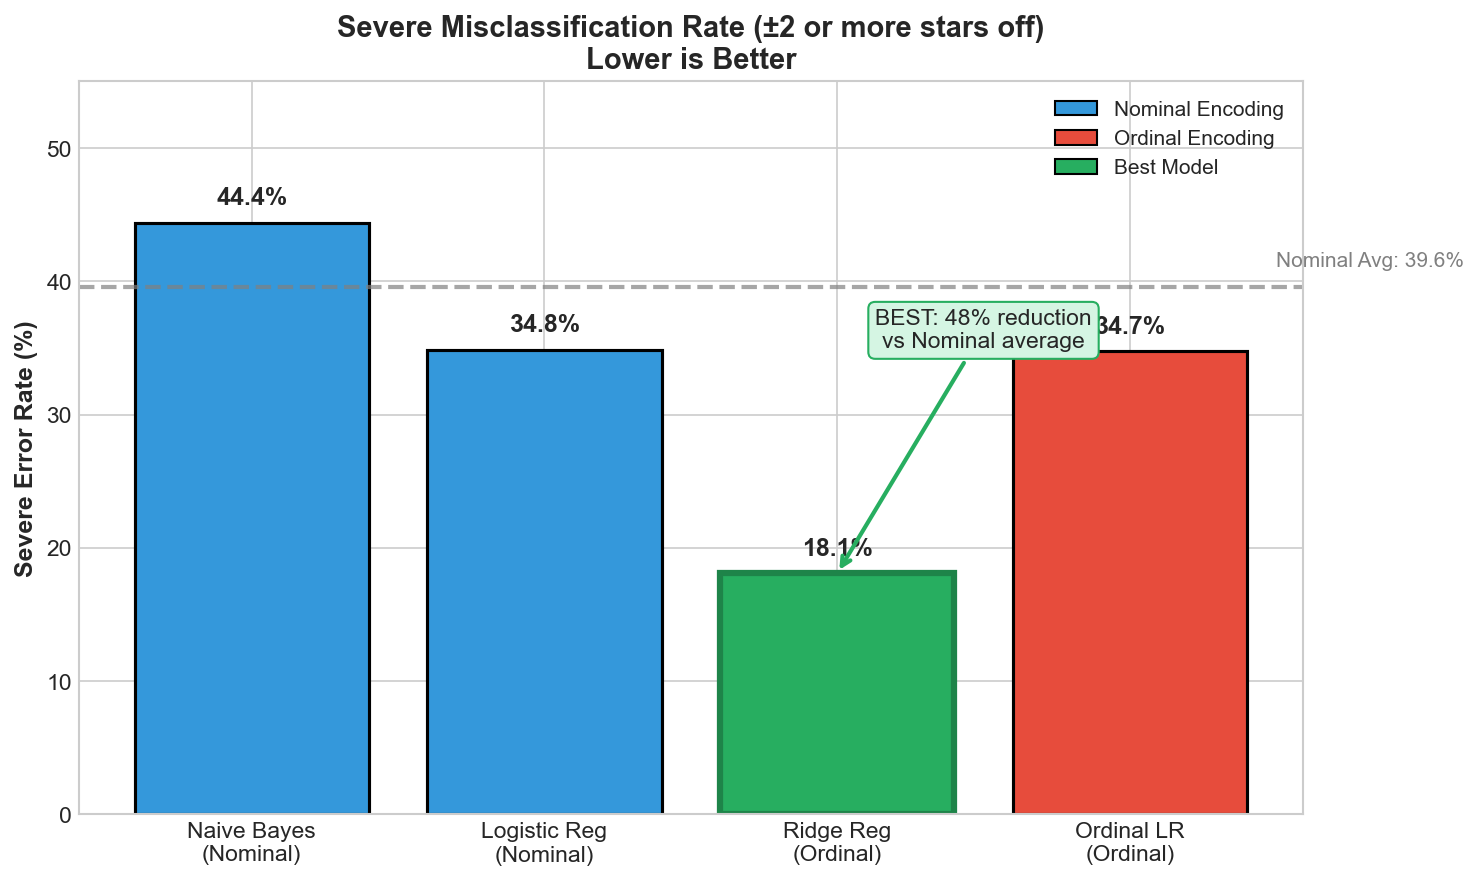


✅ Saved: fig_4_severe_error.png


In [10]:
fig, ax = plt.subplots(figsize=(10, 6))

models = ['Naive Bayes\n(Nominal)', 'Logistic Reg\n(Nominal)', 
          'Ridge Reg\n(Ordinal)', 'Ordinal LR\n(Ordinal)']
severe_rates = [44.37, 34.83, 18.08, 34.74]
colors = ['#3498db', '#3498db', '#27ae60', '#e74c3c']

bars = ax.bar(models, severe_rates, color=colors, edgecolor='black', linewidth=1.5)

# Highlight the best (lowest) severe error
bars[2].set_edgecolor('#1e8449')
bars[2].set_linewidth(3)

# Add value labels
for bar, rate in zip(bars, severe_rates):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{rate:.1f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Add annotation for best model
ax.annotate('BEST: 48% reduction\nvs Nominal average', 
            xy=(2, 18.08), xytext=(2.5, 35),
            fontsize=11, ha='center',
            arrowprops=dict(arrowstyle='->', color='#27ae60', lw=2),
            bbox=dict(boxstyle='round,pad=0.3', facecolor='#d5f5e3', edgecolor='#27ae60'))

ax.set_ylabel('Severe Error Rate (%)', fontsize=12, fontweight='bold')
ax.set_title('Severe Misclassification Rate (±2 or more stars off)\nLower is Better', 
             fontsize=14, fontweight='bold')
ax.set_ylim(0, 55)

# Add nominal average line
nominal_avg = (44.37 + 34.83) / 2
ax.axhline(y=nominal_avg, color='gray', linestyle='--', alpha=0.7, linewidth=2)
ax.text(3.5, nominal_avg + 1.5, f'Nominal Avg: {nominal_avg:.1f}%', fontsize=10, color='gray')

# Add color legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='#3498db', edgecolor='black', label='Nominal Encoding'),
                   Patch(facecolor='#e74c3c', edgecolor='black', label='Ordinal Encoding'),
                   Patch(facecolor='#27ae60', edgecolor='black', label='Best Model')]
ax.legend(handles=legend_elements, loc='upper right', fontsize=10)

plt.tight_layout()
plt.savefig(f'{OUTPUT_PATH}fig_4_severe_error.png', facecolor='white')
plt.show()
print("\n✅ Saved: fig_4_severe_error.png")

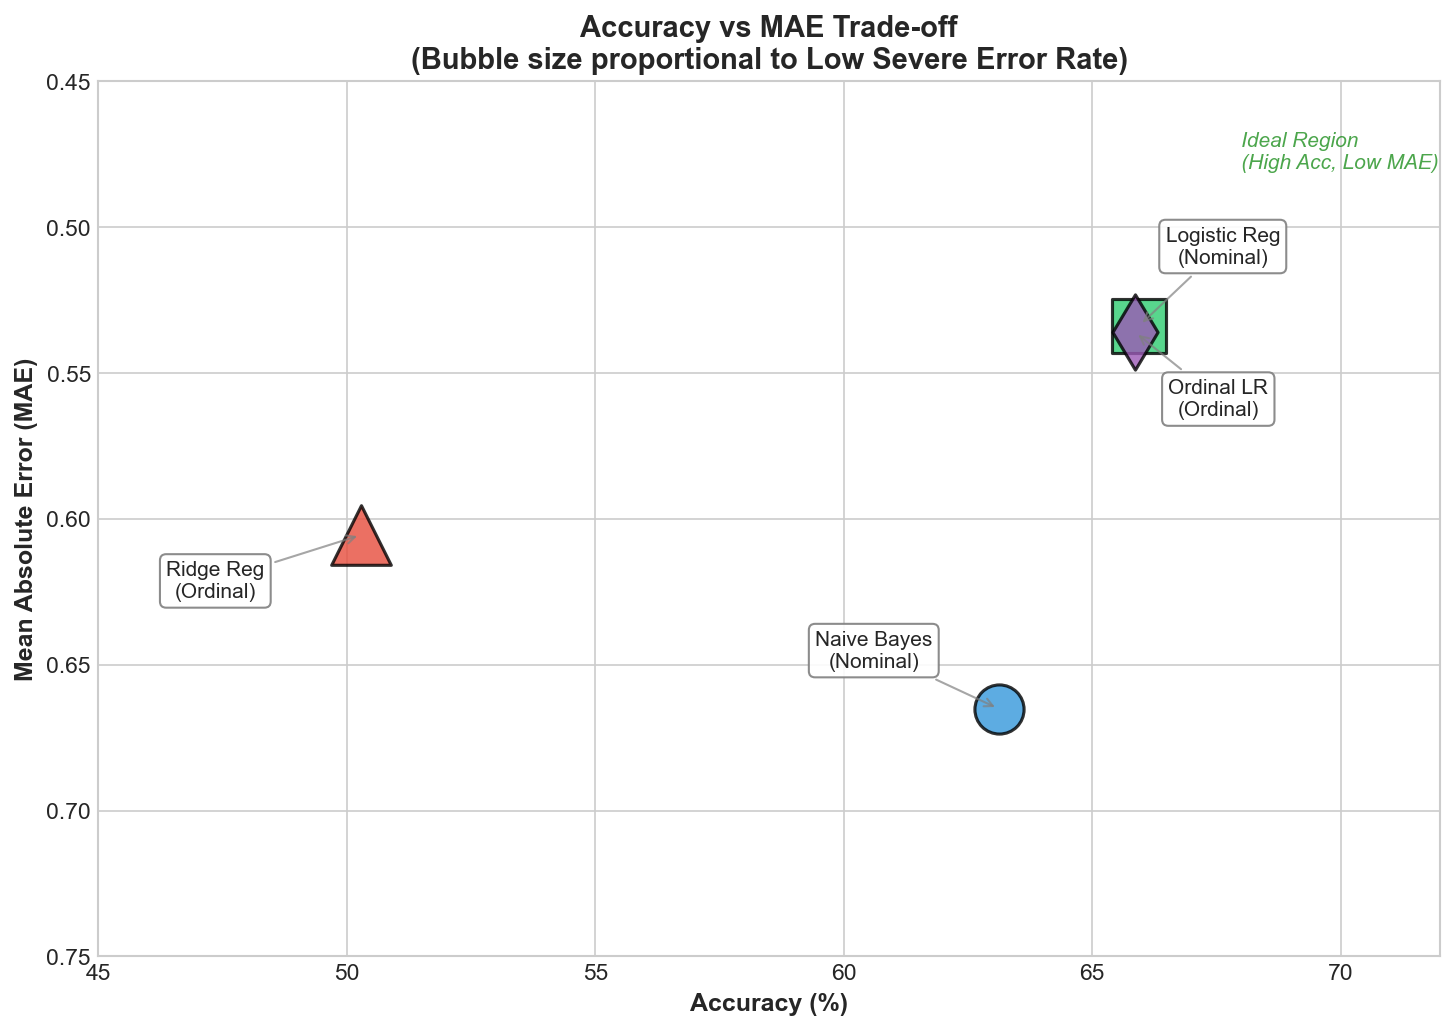


✅ Saved: fig_5_accuracy_vs_mae.png


In [11]:
fig, ax = plt.subplots(figsize=(10, 7))

# Data
models_short = ['NB', 'LR', 'Ridge', 'OLR']
accuracy = [63.12, 65.95, 50.29, 65.86]
mae = [0.6651, 0.5337, 0.6055, 0.5360]
severe = [44.37, 34.83, 18.08, 34.74]
colors = ['#3498db', '#2ecc71', '#e74c3c', '#9b59b6']
markers = ['o', 's', '^', 'd']

# Scatter plot with size proportional to (100 - severe error)
for i, (acc, m, sev, c, mark, name) in enumerate(zip(accuracy, mae, severe, colors, markers, models_short)):
    size = (100 - sev) * 10  # Size proportional to low severe error
    ax.scatter(acc, m, s=size, c=c, marker=mark, edgecolor='black', linewidth=1.5,
               label=f'{name}', alpha=0.8)

# Add annotations
annotations = [
    ('Naive Bayes\n(Nominal)', (63.12, 0.6651), (-60, 20)),
    ('Logistic Reg\n(Nominal)', (65.95, 0.5337), (40, 30)),
    ('Ridge Reg\n(Ordinal)', (50.29, 0.6055), (-70, -30)),
    ('Ordinal LR\n(Ordinal)', (65.86, 0.5360), (40, -40))
]

for name, (x, y), offset in annotations:
    ax.annotate(name, (x, y), xytext=offset, textcoords='offset points',
                fontsize=10, ha='center',
                arrowprops=dict(arrowstyle='->', color='gray', alpha=0.7),
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='gray', alpha=0.9))

ax.set_xlabel('Accuracy (%)', fontsize=12, fontweight='bold')
ax.set_ylabel('Mean Absolute Error (MAE)', fontsize=12, fontweight='bold')
ax.set_title('Accuracy vs MAE Trade-off\n(Bubble size proportional to Low Severe Error Rate)', 
             fontsize=14, fontweight='bold')

# Ideal region annotation
ax.annotate('Ideal Region\n(High Acc, Low MAE)', xy=(68, 0.48), fontsize=10,
            style='italic', color='green', alpha=0.7)

ax.set_xlim(45, 72)
ax.set_ylim(0.45, 0.75)
ax.invert_yaxis()  # Lower MAE is better, so invert

plt.tight_layout()
plt.savefig(f'{OUTPUT_PATH}fig_5_accuracy_vs_mae.png', facecolor='white')
plt.show()
print("\n✅ Saved: fig_5_accuracy_vs_mae.png")

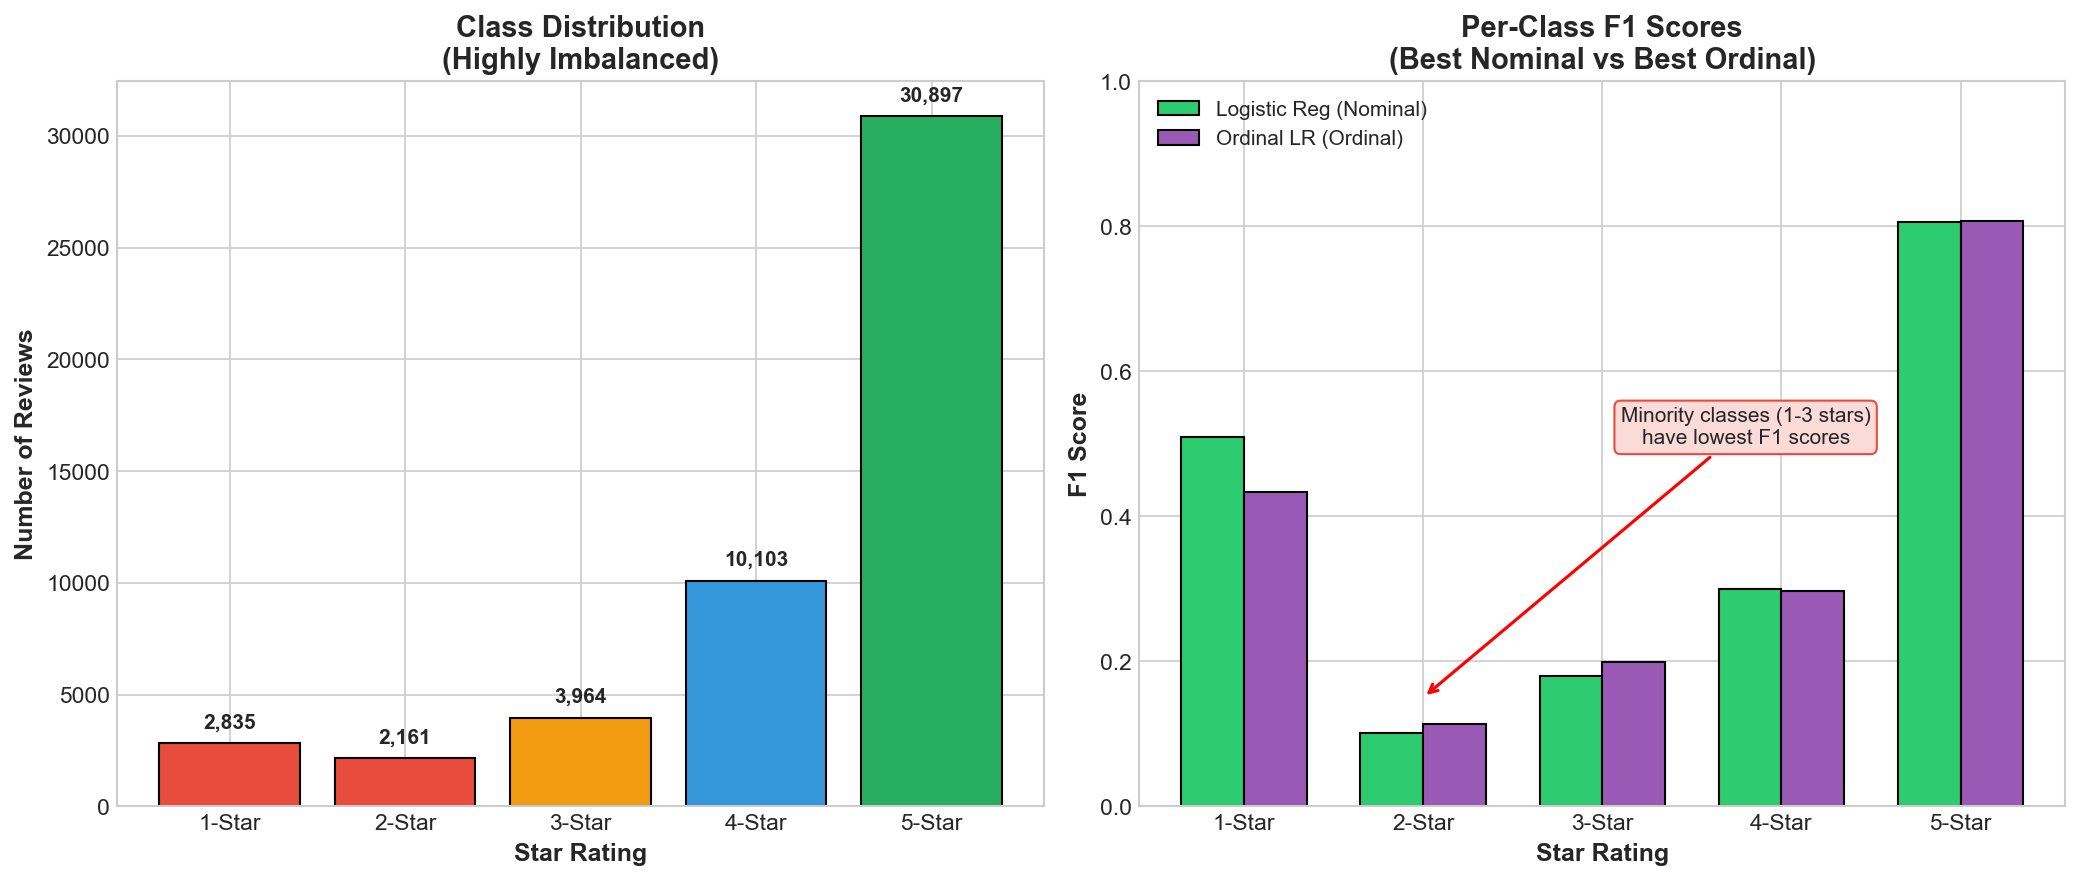


✅ Saved: fig_6_imbalance_impact.png


In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Left: Class distribution
ratings = ['1-Star', '2-Star', '3-Star', '4-Star', '5-Star']
counts = [2835, 2161, 3964, 10103, 30897]
colors_dist = ['#e74c3c', '#e74c3c', '#f39c12', '#3498db', '#27ae60']

bars1 = ax1.bar(ratings, counts, color=colors_dist, edgecolor='black')
ax1.set_ylabel('Number of Reviews', fontsize=12, fontweight='bold')
ax1.set_xlabel('Star Rating', fontsize=12, fontweight='bold')
ax1.set_title('Class Distribution\n(Highly Imbalanced)', fontsize=14, fontweight='bold')

for bar, count in zip(bars1, counts):
    ax1.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 500,
             f'{count:,}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Right: F1 scores by class for best models
x = np.arange(5)
width = 0.35

f1_lr = [0.5098, 0.1006, 0.1800, 0.3005, 0.8054]
f1_olr = [0.4332, 0.1141, 0.1993, 0.2964, 0.8080]

bars2 = ax2.bar(x - width/2, f1_lr, width, label='Logistic Reg (Nominal)', 
                color='#2ecc71', edgecolor='black')
bars3 = ax2.bar(x + width/2, f1_olr, width, label='Ordinal LR (Ordinal)', 
                color='#9b59b6', edgecolor='black')

ax2.set_ylabel('F1 Score', fontsize=12, fontweight='bold')
ax2.set_xlabel('Star Rating', fontsize=12, fontweight='bold')
ax2.set_title('Per-Class F1 Scores\n(Best Nominal vs Best Ordinal)', fontsize=14, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(ratings)
ax2.legend(loc='upper left', fontsize=10)
ax2.set_ylim(0, 1)

# Add annotation
ax2.annotate('Minority classes (1-3 stars)\nhave lowest F1 scores', 
             xy=(1, 0.15), xytext=(2.8, 0.5),
             fontsize=10, ha='center',
             arrowprops=dict(arrowstyle='->', color='red', lw=1.5),
             bbox=dict(boxstyle='round,pad=0.3', facecolor='#fadbd8', edgecolor='#e74c3c'))

plt.tight_layout()
plt.savefig(f'{OUTPUT_PATH}fig_6_imbalance_impact.png', facecolor='white')
plt.show()
print("\n✅ Saved: fig_6_imbalance_impact.png")

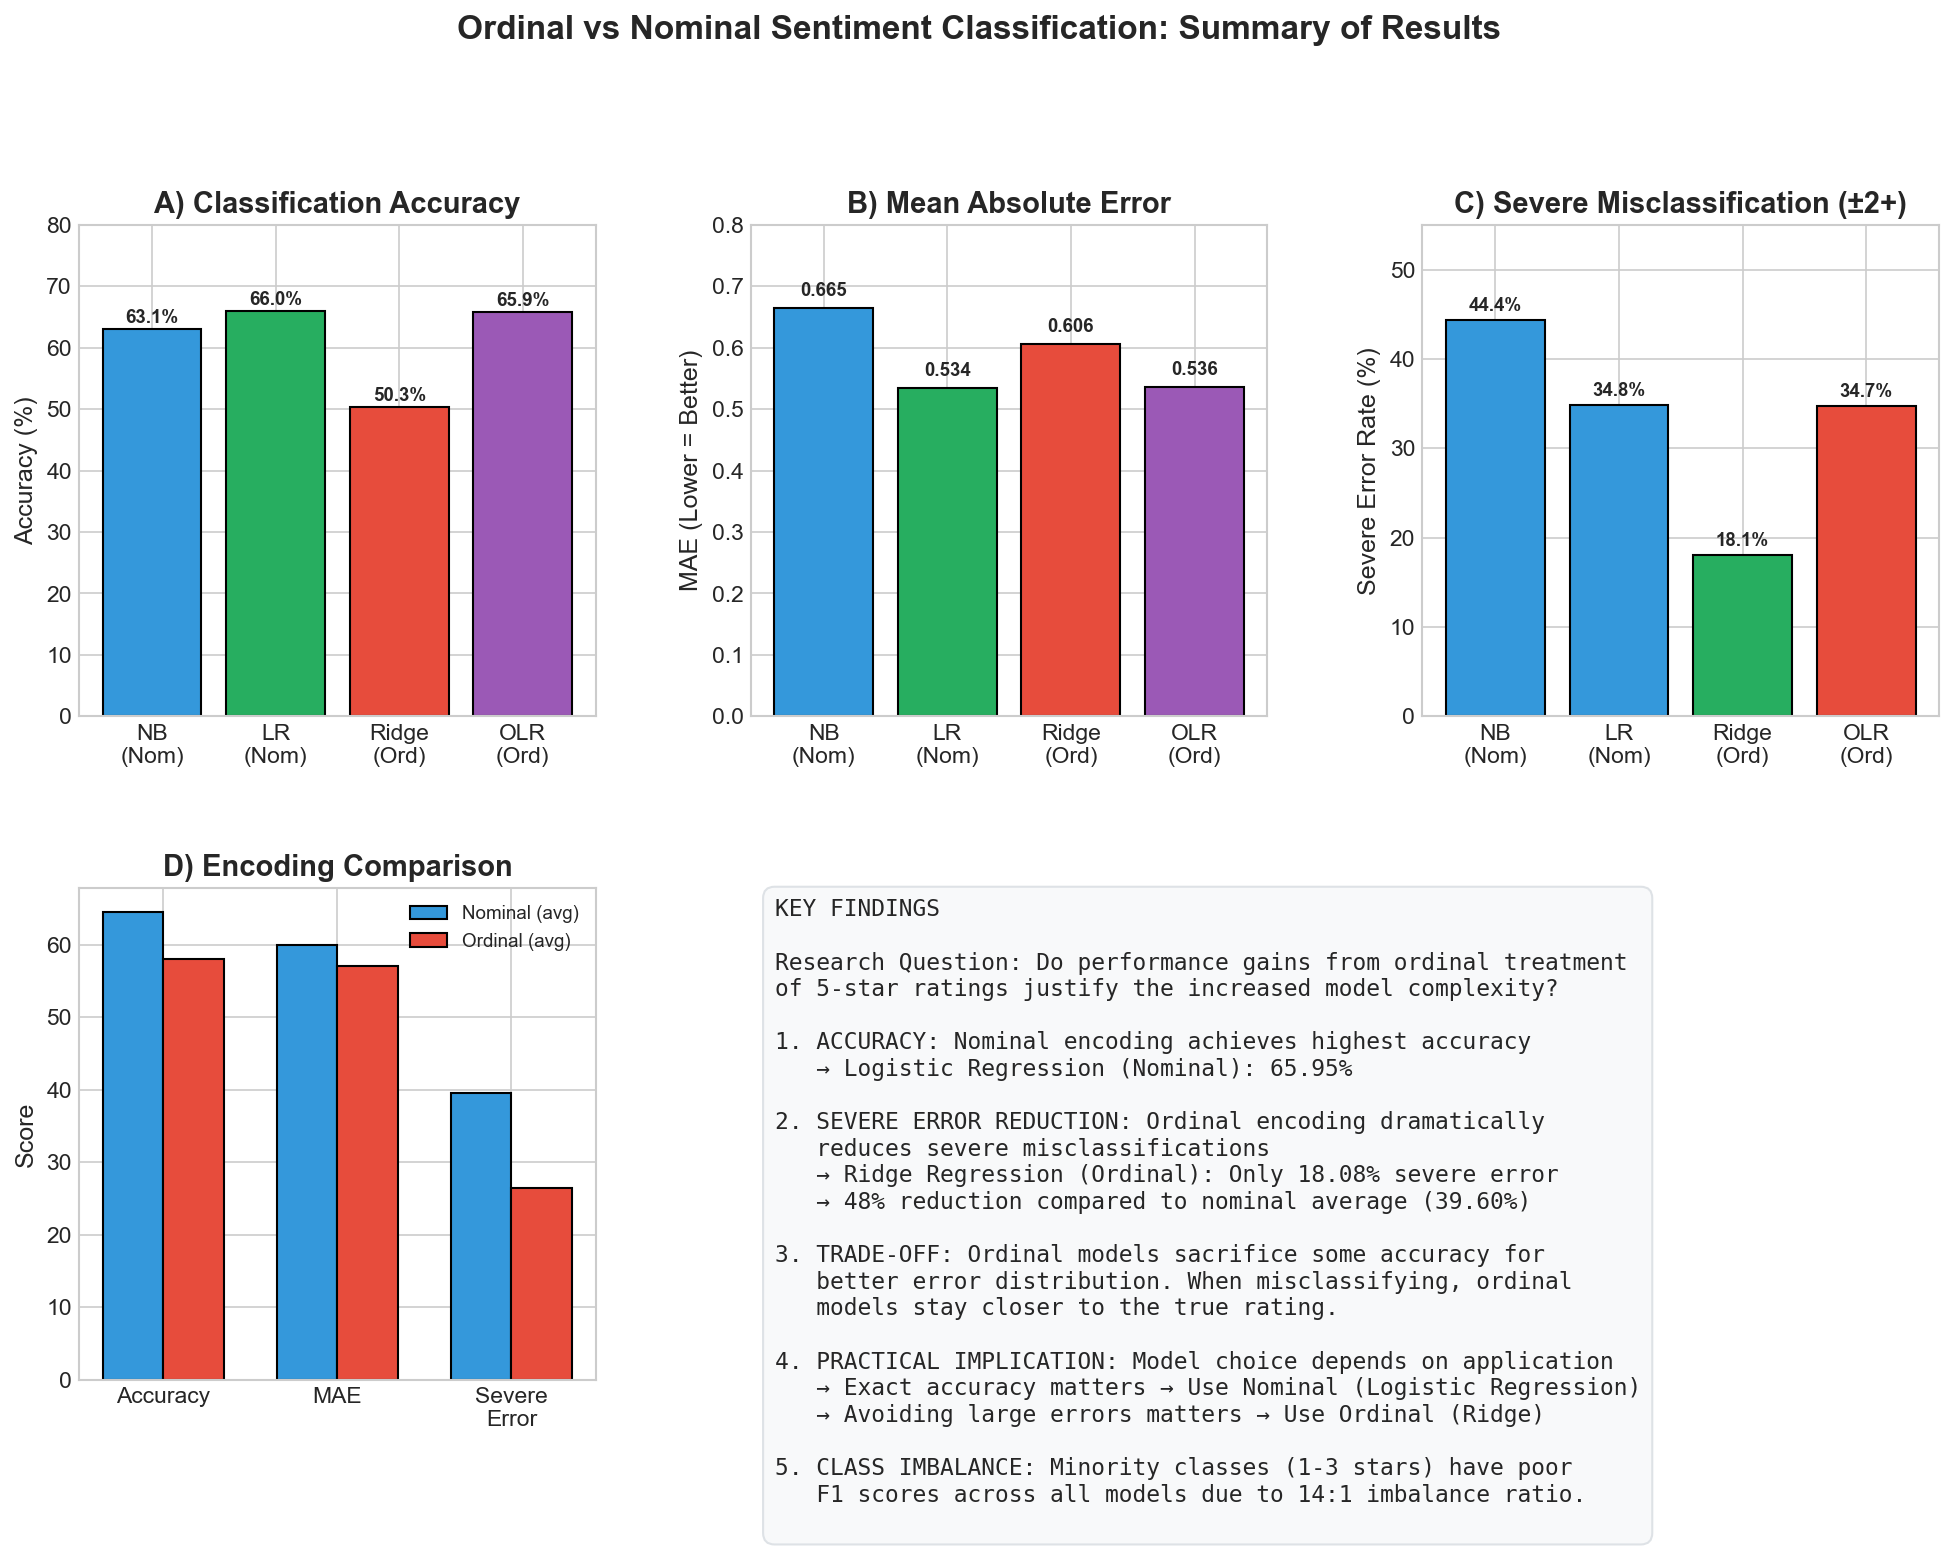


✅ Saved: fig_7_summary.png


In [13]:
fig = plt.figure(figsize=(16, 10))

# Create grid
gs = fig.add_gridspec(2, 3, hspace=0.35, wspace=0.3)

# Plot 1: Accuracy comparison
ax1 = fig.add_subplot(gs[0, 0])
models_short = ['NB\n(Nom)', 'LR\n(Nom)', 'Ridge\n(Ord)', 'OLR\n(Ord)']
accuracy = [63.12, 65.95, 50.29, 65.86]
colors = ['#3498db', '#27ae60', '#e74c3c', '#9b59b6']
bars = ax1.bar(models_short, accuracy, color=colors, edgecolor='black')
ax1.set_ylabel('Accuracy (%)')
ax1.set_title('A) Classification Accuracy', fontweight='bold')
ax1.set_ylim(0, 80)
for bar, acc in zip(bars, accuracy):
    ax1.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 1,
             f'{acc:.1f}%', ha='center', fontsize=9, fontweight='bold')

# Plot 2: MAE comparison
ax2 = fig.add_subplot(gs[0, 1])
mae = [0.6651, 0.5337, 0.6055, 0.5360]
bars = ax2.bar(models_short, mae, color=colors, edgecolor='black')
ax2.set_ylabel('MAE (Lower = Better)')
ax2.set_title('B) Mean Absolute Error', fontweight='bold')
ax2.set_ylim(0, 0.8)
for bar, m in zip(bars, mae):
    ax2.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.02,
             f'{m:.3f}', ha='center', fontsize=9, fontweight='bold')

# Plot 3: Severe Error comparison
ax3 = fig.add_subplot(gs[0, 2])
severe = [44.37, 34.83, 18.08, 34.74]
bar_colors = ['#3498db', '#3498db', '#27ae60', '#e74c3c']
bars = ax3.bar(models_short, severe, color=bar_colors, edgecolor='black')
ax3.set_ylabel('Severe Error Rate (%)')
ax3.set_title('C) Severe Misclassification (±2+)', fontweight='bold')
ax3.set_ylim(0, 55)
for bar, s in zip(bars, severe):
    ax3.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 1,
             f'{s:.1f}%', ha='center', fontsize=9, fontweight='bold')

# Plot 4: Ordinal vs Nominal summary
ax4 = fig.add_subplot(gs[1, 0])
metrics = ['Accuracy', 'MAE', 'Severe\nError']
# Normalize for comparison (scale 0-100)
nominal_avg = [64.54, 59.94, 39.60]  # MAE scaled, Severe as-is
ordinal_avg = [58.08, 57.08, 26.41]
x = np.arange(len(metrics))
width = 0.35
ax4.bar(x - width/2, nominal_avg, width, label='Nominal (avg)', color='#3498db', edgecolor='black')
ax4.bar(x + width/2, ordinal_avg, width, label='Ordinal (avg)', color='#e74c3c', edgecolor='black')
ax4.set_xticks(x)
ax4.set_xticklabels(metrics)
ax4.set_title('D) Encoding Comparison', fontweight='bold')
ax4.legend(fontsize=9)
ax4.set_ylabel('Score')

# Plot 5: Key findings text box
ax5 = fig.add_subplot(gs[1, 1:])
ax5.axis('off')

findings_text = """KEY FINDINGS

Research Question: Do performance gains from ordinal treatment 
of 5-star ratings justify the increased model complexity?

1. ACCURACY: Nominal encoding achieves highest accuracy
   → Logistic Regression (Nominal): 65.95%

2. SEVERE ERROR REDUCTION: Ordinal encoding dramatically 
   reduces severe misclassifications
   → Ridge Regression (Ordinal): Only 18.08% severe error
   → 48% reduction compared to nominal average (39.60%)

3. TRADE-OFF: Ordinal models sacrifice some accuracy for 
   better error distribution. When misclassifying, ordinal 
   models stay closer to the true rating.

4. PRACTICAL IMPLICATION: Model choice depends on application
   → Exact accuracy matters → Use Nominal (Logistic Regression)
   → Avoiding large errors matters → Use Ordinal (Ridge)

5. CLASS IMBALANCE: Minority classes (1-3 stars) have poor 
   F1 scores across all models due to 14:1 imbalance ratio.
"""

ax5.text(0.02, 0.98, findings_text, transform=ax5.transAxes, fontsize=11,
         verticalalignment='top', fontfamily='monospace',
         bbox=dict(boxstyle='round', facecolor='#f8f9fa', edgecolor='#dee2e6', pad=0.5))

plt.suptitle('Ordinal vs Nominal Sentiment Classification: Summary of Results', 
             fontsize=16, fontweight='bold', y=1.02)

plt.savefig(f'{OUTPUT_PATH}fig_7_summary.png', facecolor='white', bbox_inches='tight')
plt.show()
print("\n✅ Saved: fig_7_summary.png")

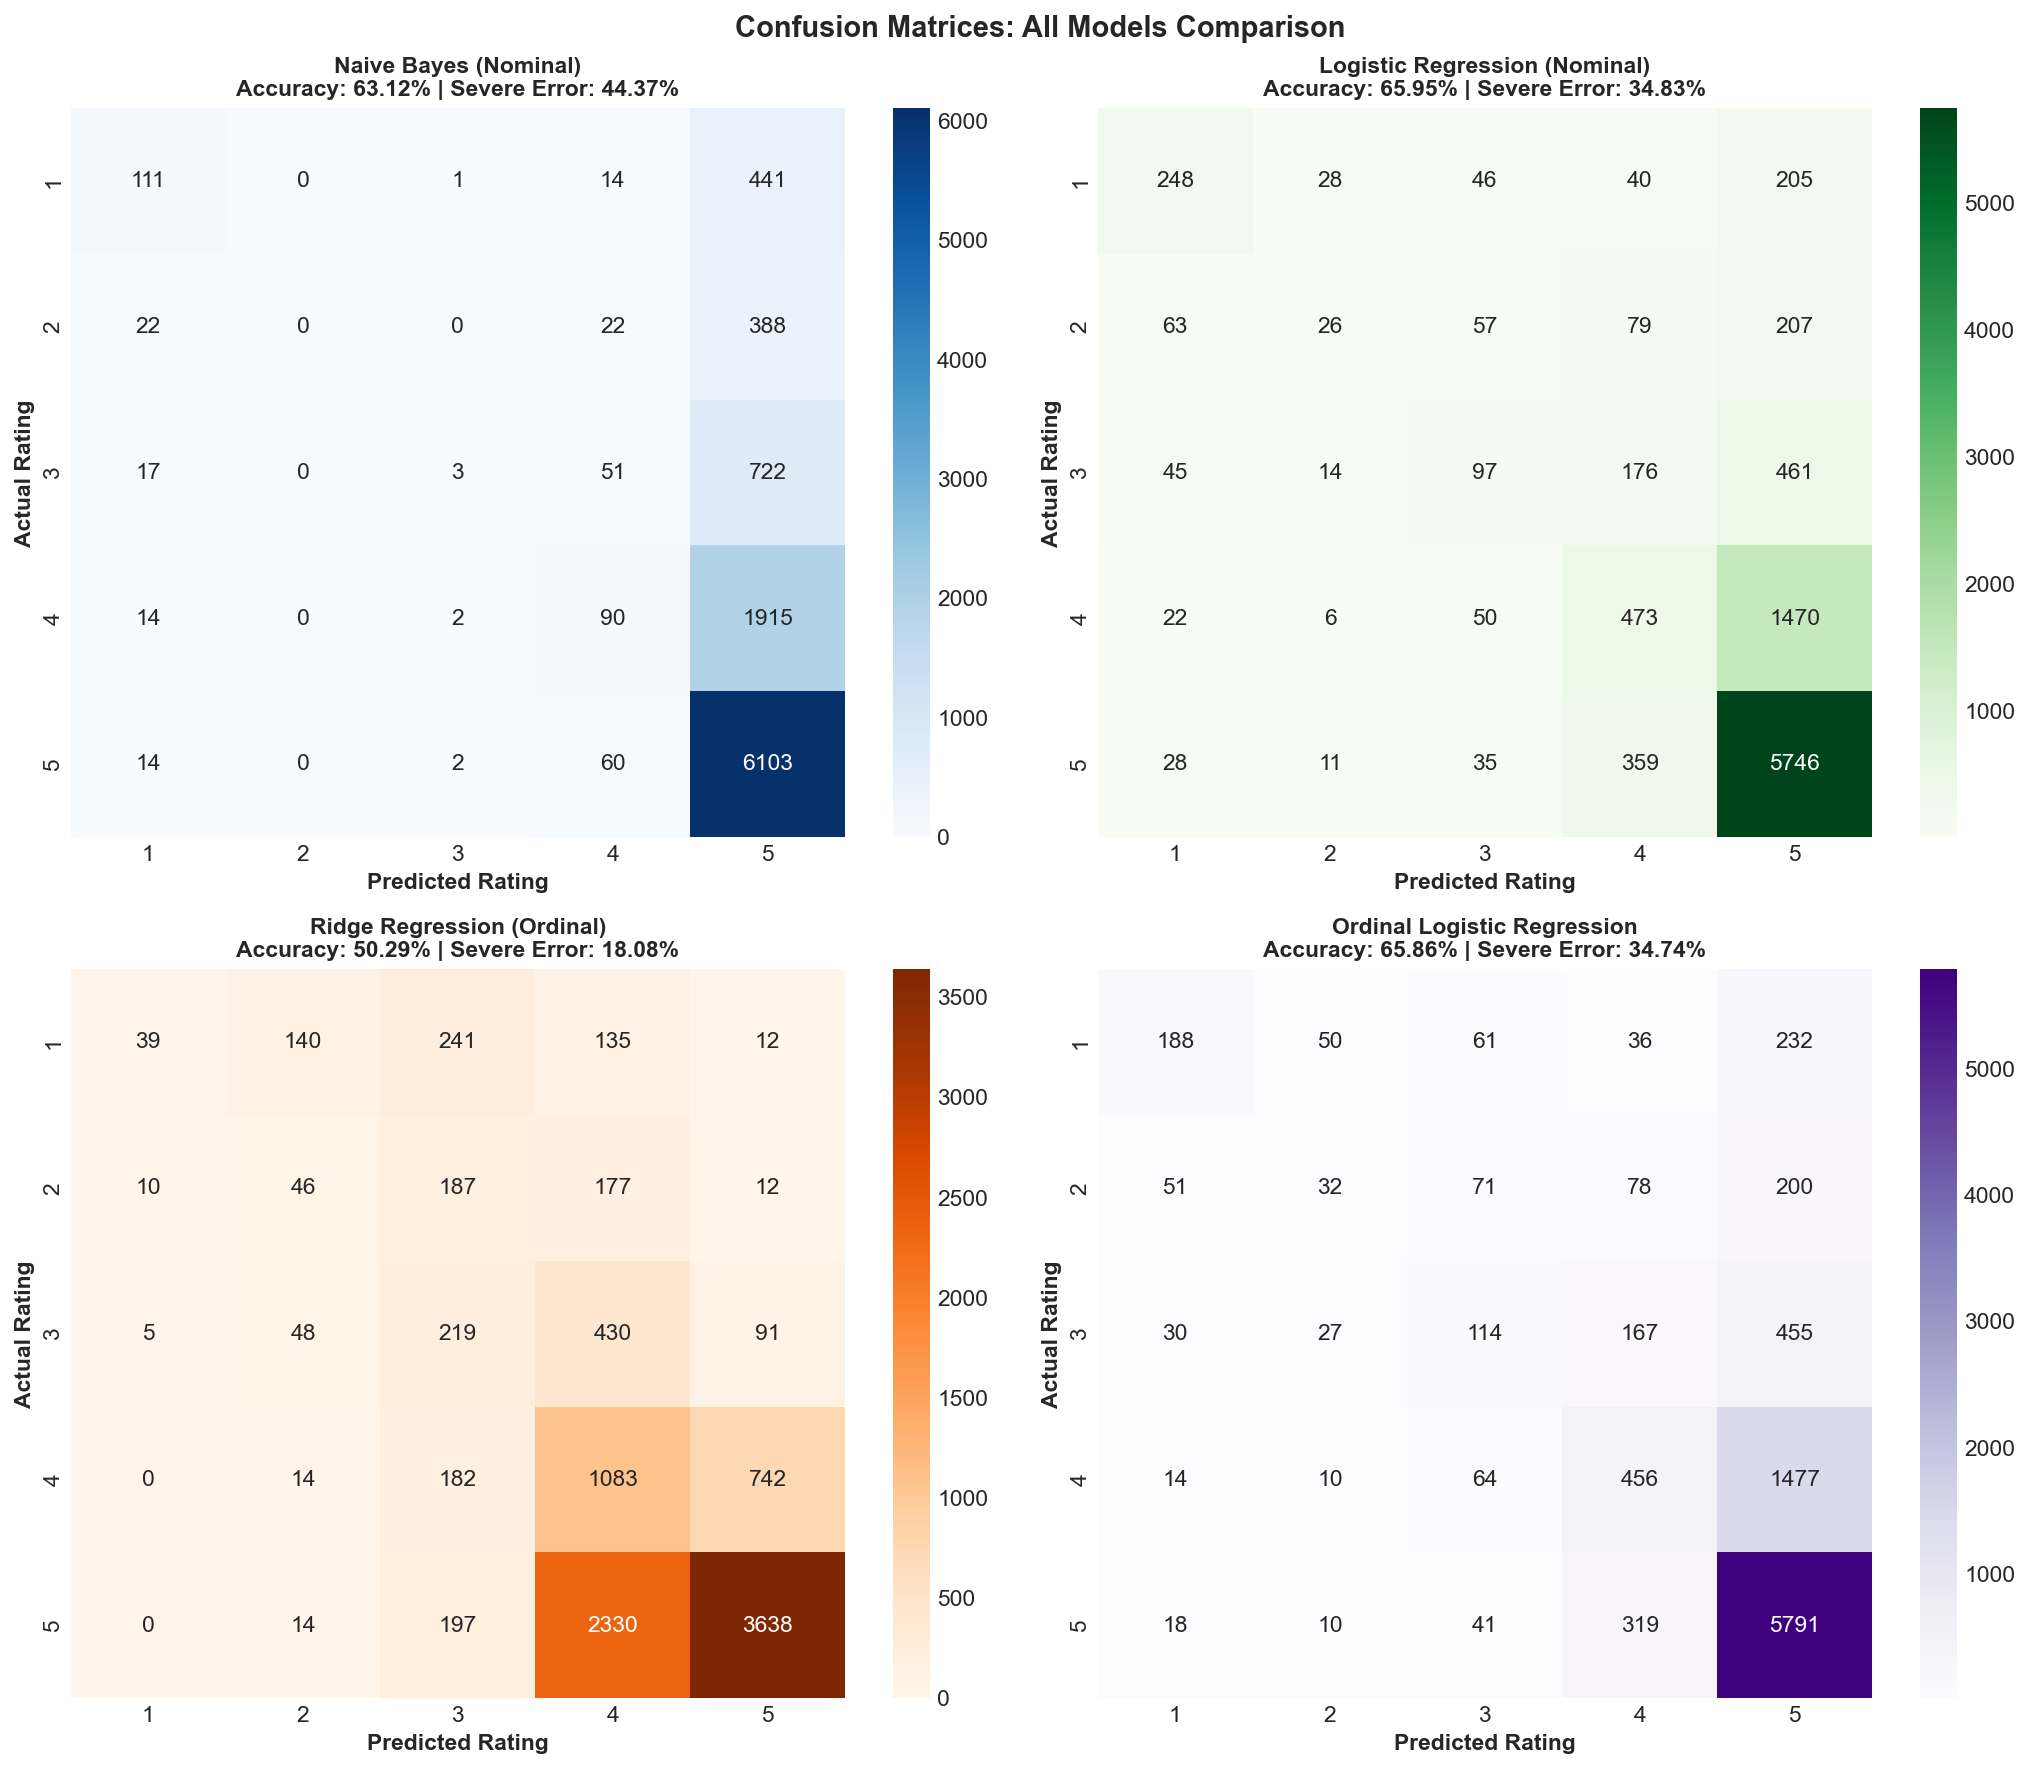


✅ Saved: fig_8_confusion_matrices.png


In [14]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Confusion matrices
cms = [cm_nb, cm_lr, cm_ridge, cm_olr]
titles = [
    'Naive Bayes (Nominal)\nAccuracy: 63.12% | Severe Error: 44.37%',
    'Logistic Regression (Nominal)\nAccuracy: 65.95% | Severe Error: 34.83%',
    'Ridge Regression (Ordinal)\nAccuracy: 50.29% | Severe Error: 18.08%',
    'Ordinal Logistic Regression\nAccuracy: 65.86% | Severe Error: 34.74%'
]
cmaps = ['Blues', 'Greens', 'Oranges', 'Purples']

for ax, cm, title, cmap in zip(axes.flat, cms, titles, cmaps):
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, ax=ax,
                xticklabels=['1', '2', '3', '4', '5'],
                yticklabels=['1', '2', '3', '4', '5'])
    ax.set_xlabel('Predicted Rating', fontsize=11, fontweight='bold')
    ax.set_ylabel('Actual Rating', fontsize=11, fontweight='bold')
    ax.set_title(title, fontsize=11, fontweight='bold')

plt.suptitle('Confusion Matrices: All Models Comparison', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig(f'{OUTPUT_PATH}fig_8_confusion_matrices.png', facecolor='white')
plt.show()
print("\n✅ Saved: fig_8_confusion_matrices.png")

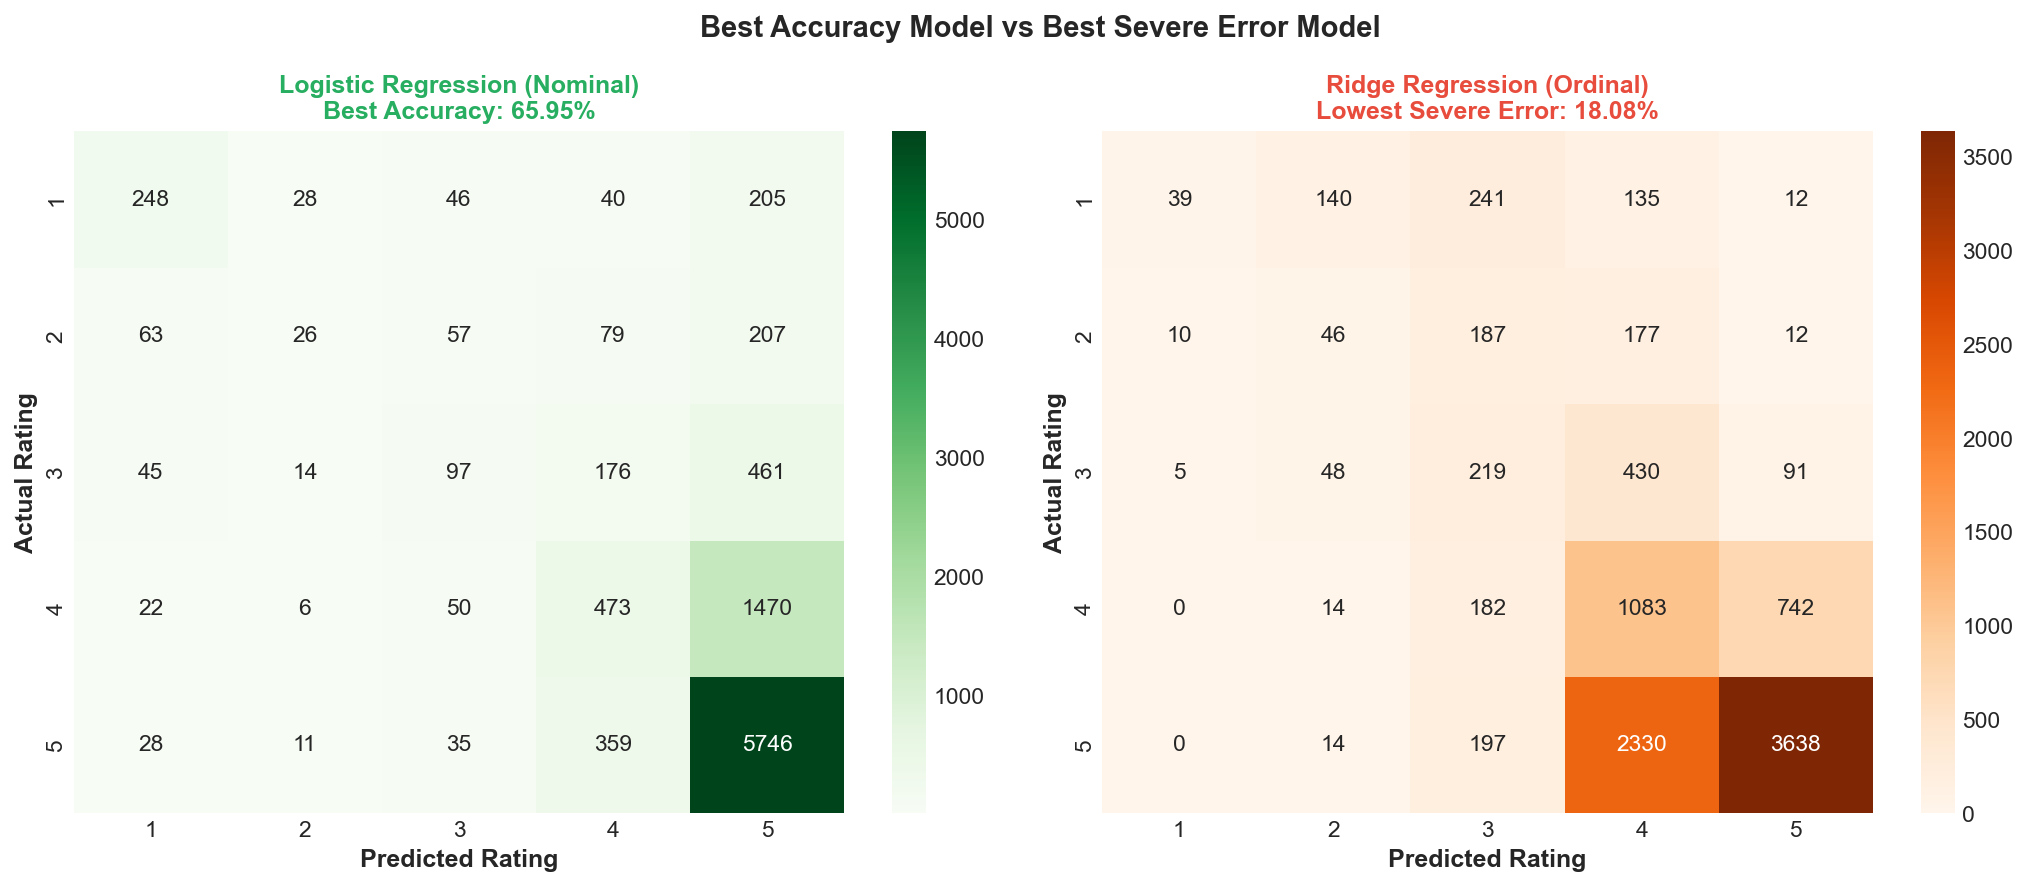


✅ Saved: fig_9_best_vs_best.png


In [15]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot Logistic Regression (Best Accuracy)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Greens', ax=axes[0],
            xticklabels=['1', '2', '3', '4', '5'],
            yticklabels=['1', '2', '3', '4', '5'])
axes[0].set_xlabel('Predicted Rating', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Actual Rating', fontsize=12, fontweight='bold')
axes[0].set_title('Logistic Regression (Nominal)\nBest Accuracy: 65.95%', 
                  fontsize=12, fontweight='bold', color='#27ae60')

# Plot Ridge Regression (Best Severe Error)
sns.heatmap(cm_ridge, annot=True, fmt='d', cmap='Oranges', ax=axes[1],
            xticklabels=['1', '2', '3', '4', '5'],
            yticklabels=['1', '2', '3', '4', '5'])
axes[1].set_xlabel('Predicted Rating', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Actual Rating', fontsize=12, fontweight='bold')
axes[1].set_title('Ridge Regression (Ordinal)\nLowest Severe Error: 18.08%', 
                  fontsize=12, fontweight='bold', color='#e74c3c')

plt.suptitle('Best Accuracy Model vs Best Severe Error Model', 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig(f'{OUTPUT_PATH}fig_9_best_vs_best.png', facecolor='white')
plt.show()
print("\n✅ Saved: fig_9_best_vs_best.png")

In [16]:
print("="*70)
print("📊 ALL VISUALIZATIONS COMPLETE!")
print("="*70)
print(f"\nOutput folder: {OUTPUT_PATH}")
print("\nFigures generated:")
print("-"*70)
print("1. fig_1_f1_heatmap.png        - Per-class F1 scores heatmap")
print("2. fig_2_error_distribution.png - Error type breakdown (stacked)")
print("3. fig_3_radar_comparison.png   - Multi-metric radar chart")
print("4. fig_4_severe_error.png       - Severe error comparison ⭐ KEY")
print("5. fig_5_accuracy_vs_mae.png    - Trade-off scatter plot")
print("6. fig_6_imbalance_impact.png   - Class imbalance analysis")
print("7. fig_7_summary.png            - Complete summary ⭐ MAIN")
print("8. fig_8_confusion_matrices.png - All 4 confusion matrices")
print("9. fig_9_best_vs_best.png       - Best accuracy vs best error")
print("-"*70)
print("\n📝 Recommended for IEEE Report:")
print("   • Figure 1: Class distribution (from Notebook 2)")
print("   • Figure 2: fig_7_summary.png (main results)")
print("   • Figure 3: fig_9_best_vs_best.png (confusion matrices)")
print("   • Figure 4: fig_4_severe_error.png (key finding)")

📊 ALL VISUALIZATIONS COMPLETE!

Output folder: /content/drive/MyDrive/Fall 2025/Foundations of Artificial Intelligence/Final Project/figures/

Figures generated:
----------------------------------------------------------------------
1. fig_1_f1_heatmap.png        - Per-class F1 scores heatmap
2. fig_2_error_distribution.png - Error type breakdown (stacked)
3. fig_3_radar_comparison.png   - Multi-metric radar chart
4. fig_4_severe_error.png       - Severe error comparison ⭐ KEY
5. fig_5_accuracy_vs_mae.png    - Trade-off scatter plot
6. fig_6_imbalance_impact.png   - Class imbalance analysis
7. fig_7_summary.png            - Complete summary ⭐ MAIN
8. fig_8_confusion_matrices.png - All 4 confusion matrices
9. fig_9_best_vs_best.png       - Best accuracy vs best error
----------------------------------------------------------------------

📝 Recommended for IEEE Report:
   • Figure 1: Class distribution (from Notebook 2)
   • Figure 2: fig_7_summary.png (main results)
   • Figure 3: fig_9